In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime

In [2]:
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()
  print("Enabled compatitility to tf1.x")

Instructions for updating:
non-resource variables are not supported in the long term
Enabled compatitility to tf1.x


In [3]:
#cargamos los datos del proyecto
url = 'https://raw.githubusercontent.com/marlonSamuel/proyecto_python/master/data.csv'
df = pd.read_csv(url, index_col=0)
df.head()

,sale_price,overall_qual,square_feet,total_room,year_build,lot_frontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [10]:
#dividiendo data
n = len(df)
y_train = np.array(df[:int(n*0.8)]["sale_price"]/1000)
y_test = np.array(df[len(y_train):n]["sale_price"]/1000)
x_train = np.array(df[:int(n*0.8)]["overall_qual"])
x_test = np.array(df[len(y_train):n]["overall_qual"])

ones = np.ones_like(x_train)
x_t = np.transpose(np.stack((np.float32(x_train),np.float32(ones))))
x_t

array([[7., 1.],
       [6., 1.],
       [7., 1.],
       ...,
       [7., 1.],
       [8., 1.],
       [6., 1.]], dtype=float32)

In [6]:
def error(y_real,y_aprox):
    return 1/2*tf.reduce_mean(tf.math.square(y_real - y_aprox) )

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Parametros de w:
[[33.0536   ]
 [ 5.4177127]]
error:  4490.5684
Parametros de w:
[[  6.6347895]
 [138.09941  ]]
error:  3147.0823
Parametros de w:
[[  1.6014416]
 [170.33424  ]]
error:  3105.8486
Parametros de w:
[[  0.38654518]
 [178.11475   ]]
error:  3103.4468


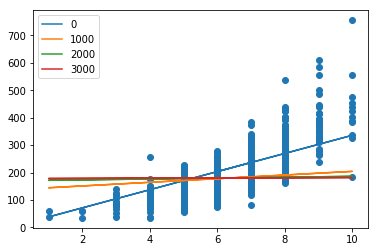

In [15]:
plt.scatter(x_train,y_train)

tf.reset_default_graph()

learning_rate = 0.03

w = tf.get_variable(name="w",dtype=tf.float32,shape=[2,1],
                    initializer=tf.zeros_initializer())

tensor_x = tf.placeholder(tf.float32, shape=None, name="tensor_x")
tensor_y = tf.placeholder(tf.float32,[len(x_train)],"tensor_y")


prediccion = tf.matmul(tensor_x,w)
gradiente = tf.gradients(error(tensor_y,prediccion),w)
err = error(tensor_y,prediccion)

update = tf.assign(w, w - gradiente[0] * learning_rate)

with tf.train.MonitoredSession() as session:
  feed_dict = {tensor_x:x_t, tensor_y:y_train}
  for i in range(4000):
    #gradientes = session.run(gradiente,feed_dict)
    update_params = session.run(update,feed_dict)
    predicciones = session.run(prediccion,feed_dict)
    if i%1000 == 0:
        print("Parametros de w:")
        print(session.run(w))
        print('error: ',session.run(err,feed_dict))
        plt.plot(x_train,predicciones,label=str(i))
plt.legend()
plt.show()